# About

SHiP track pattern recognition is in this notebook.

# Data

In [1]:
import os, sys
sys.path.append('../functions')

In [2]:
%matplotlib inline
import pandas
import numpy
import matplotlib.pyplot as plt
import cPickle as pickle

In [3]:
all_mctracks = pandas.read_csv('Data/MCTrack.csv', delimiter=',')
all_velo_points = pandas.read_csv('Data/vetoPoint.csv', delimiter=',')
all_hits = pandas.read_csv('Data/strawtubesPoint_decoded_hits.csv', delimiter=',')
all_hits['Index'] = all_hits.index

# Get reconstructible events

In [4]:
from utils import get_reconstractible_events
#reconstructible_events = get_reconstractible_events(range(0, 2500), all_hits, all_mctracks, all_velo_points)

# file_pickle = open('./Data/reco_tracks_for_pattern_recognition.pkl', 'wb')
# pickle.dump(reconstructible_events, file_pickle)
# file_pickle.close()

file_pickle = open('./Data/reco_tracks_for_pattern_recognition.pkl', 'rb')
reconstructible_events_pkl = pickle.load(file_pickle)
file_pickle.close()

reconstructible_events = reconstructible_events_pkl

In [5]:
# reconstructible_events_valid = get_reconstractible_events(range(2500, 5000), all_hits, all_mctracks, all_velo_points)

# file_pickle = open('./Data/reco_tracks_for_pattern_recognition_valid.pkl', 'wb')
# pickle.dump(reconstructible_events_valid, file_pickle)
# file_pickle.close()

file_pickle = open('./Data/reco_tracks_for_pattern_recognition_valid.pkl', 'rb')
reconstructible_events_valid_pkl = pickle.load(file_pickle)
file_pickle.close()

reconstructible_events_valid = reconstructible_events_valid_pkl

In [6]:
numpy.array(reconstructible_events.keys())

array([ 513,    2,  515,  516, 1541,  518,    7,   10, 2059, 1036, 1550,
         15, 2392, 1042, 1557,   23,   27, 2077, 2132, 1057,  549,   39,
       1066, 2482,  558, 2095,   48,  928,   50, 2099,   53, 1204, 1546,
         62, 1600, 2113, 1090, 1206, 1606, 1607, 1548,   74, 1293, 2232,
         84,   85,   86, 1111, 2138, 1116, 1629,  606, 1893,  608,   97,
       1979,  612, 1637,  614, 1129,  106, 1895, 2305, 2157,  622, 1213,
       1136,  625, 1138, 2164, 1142, 1655,  122, 1385,  126,  686,  129,
        642,  131, 1668, 1157,  134,  135,  648, 1280,  651, 1677,  654,
        143, 1683, 1691, 2204, 1693,  670,  159, 2208,  161, 2246, 1190,
       1704,  174,  824, 2224, 1224,  179,  692, 1717,  694,  184, 1722,
       1724,  189, 2239,  707, 2244, 1967, 1222,  712, 1200, 1900,  719,
       1232, 2446,  211, 2260, 1238,  215, 2264, 1242, 1243, 1756,  221,
       1758, 2271,  736, 1761, 1762, 1251, 2277, 1256, 1769, 2282,  747,
       2429, 2002, 1262,  893, 1265, 2290, 1235, 22

In [7]:
def merge_dicts(dicts):
    '''
    Given any number of dicts, shallow copy and merge into a new dict,
    precedence goes to key value pairs in latter dicts.
    '''
    result = {}
    for dictionary in dicts:
        result.update(dictionary)
    return result

reconstructible_events = merge_dicts([reconstructible_events_pkl, reconstructible_events_valid_pkl])

# Stations 1&2

In [8]:
%%time
from Y_views import loop_yz
from UV_views import loop_xz

reco_events12 = {}

for event_id in reconstructible_events.keys():
    
    event = all_hits[all_hits.event == event_id]
    
    tracks_yz, linking_table_yz = loop_yz(event, 7, 0.85, 0, 0)
    tracks_xz, linking_table_xz, Xs = loop_xz(event, tracks_yz, linking_table_yz, 6, 15, 0)
    
    reco = [tracks_yz, linking_table_yz, tracks_xz, linking_table_xz]
    
    reco_events12[event_id] = reco

CPU times: user 2min 22s, sys: 1.53 s, total: 2min 23s
Wall time: 2min 26s


In [9]:
file_pickle = open('./Data/reco_events12.pkl', 'wb')
pickle.dump(reco_events12, file_pickle)
file_pickle.close()

file_pickle = open('./Data/reco_events12.pkl', 'rb')
reco_events12_pkl = pickle.load(file_pickle)
file_pickle.close()

reco_events12 = reco_events12_pkl

# Stations 3&4

In [10]:
from Y_views import loop_yz
from UV_views import loop_xz

reco_events34 = {}

for event_id in reconstructible_events.keys():
    
    event = all_hits[all_hits.event == event_id]
    
    tracks_yz, linking_table_yz = loop_yz(event, 7, 0.85, 1, 0)
    tracks_xz, linking_table_xz, Xs = loop_xz(event, tracks_yz, linking_table_yz, 6, 15, 1)
    
    reco = [tracks_yz, linking_table_yz, tracks_xz, linking_table_xz]
    
    reco_events34[event_id] = reco

In [11]:
file_pickle = open('./Data/reco_events34.pkl', 'wb')
pickle.dump(reco_events34, file_pickle)
file_pickle.close()

file_pickle = open('./Data/reco_events34.pkl', 'rb')
reco_events34_pkl = pickle.load(file_pickle)
file_pickle.close()

reco_events34 = reco_events34_pkl

# Combination tracks

### Data Preparation

In [12]:
from MatchTracks import get_dx_dy, get_true_label, get_matching_data, get_new_matched_tracks, get_true_match

data = get_matching_data(reco_events12, reco_events34, all_hits)


data['dk_xz'] = data['k_xz_34'].values - data['k_xz_12'].values
data['db_xz'] = data['b_xz_34'].values - data['b_xz_12'].values
data['dk_yz'] = data['k_yz_34'].values - data['k_yz_12'].values
data['db_yz'] = data['b_yz_34'].values - data['b_yz_12'].values


X_data = data[[u'dx', u'dy', 
          u'k_xz_12', u'b_xz_12', 
          u'k_yz_12',u'b_yz_12', 
          u'k_xz_34', u'b_xz_34', 
          u'k_yz_34', u'b_yz_34', 
          'dk_xz', 'db_xz', 
          'dk_yz', 'db_yz']].values
y_data = data[['label']].values.reshape(-1)

### Train Classifier

In [13]:
from rep.metaml import FoldingClassifier
from rep.estimators import XGBoostClassifier


from rep.estimators import XGBoostClassifier
xgb_base = XGBoostClassifier(n_estimators=1000, colsample=0.7, eta=0.01, nthreads=3, 
                             subsample=0.5, max_depth=8)
folding = FoldingClassifier(xgb_base, n_folds=10, random_state=11)
%time folding.fit(X_data, y_data)

CPU times: user 1min 26s, sys: 29.5 s, total: 1min 56s
Wall time: 1min 8s


FoldingClassifier(base_estimator=XGBoostClassifier(base_score=0.5, colsample=0.7, eta=0.01, features=None,
         gamma=None, max_depth=8, min_child_weight=1.0, missing=-999.0,
         n_estimators=1000, nthreads=3, num_feature=None, random_state=0,
         scale_pos_weight=1.0, subsample=0.5, verbose=0),
         features=['Feature_0', 'Feature_1', 'Feature_2', 'Feature_3', 'Feature_4', 'Feature_5', 'Feature_6', 'Feature_7', 'Feature_8', 'Feature_9', 'Feature_10', 'Feature_11', 'Feature_12', 'Feature_13'],
         n_folds=10, parallel_profile=None, random_state=11)

### Prediction and Quality

KFold prediction using folds column
KFold prediction using folds column
0.99731616244


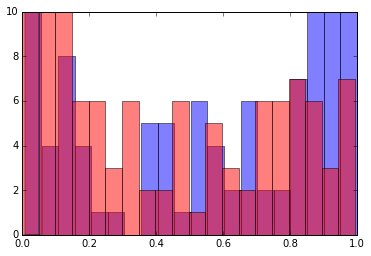

In [14]:
y_proba = folding.predict_proba(X_data)[:, 1]
y_predict = folding.predict(X_data)

from sklearn.metrics import roc_auc_score
print roc_auc_score(y_data, y_proba)

plt.hist(y_proba[y_data==1], label='1', color='b', bins=20, alpha=0.5)
plt.hist(y_proba[y_data==0], label='0', color='r', bins=20, alpha=0.5)
plt.ylim(0,10)
plt.show()

### Tracks Combination

In [15]:
match_tracks = {}
for event_id in reco_events12.keys():
    
    ids = data[data.EventID.values == event_id][['track_id_12', 'track_id_34']].values
    probas = y_proba[data.EventID.values == event_id]
    
    match_tracks[event_id] = ids[probas.argsort()[::-1], :][:2, :]
    #match_tracks[event_id] = ids[probas > 0.5, :]
    if len(match_tracks[event_id]) < 2:
        print event_id

270
1528
3670
2040


In [16]:
charge_dict, pinv_dict, dist_y, dist_x = get_new_matched_tracks(reco_events12, reco_events34, match_tracks)

true_charge_dict, true_pdg_dict, true_pinv_dict = get_true_match(reco_events12, reco_events34, match_tracks, all_hits)

# Efficiency

### Stations 1&2

In [17]:
from efficiency import efficiency_per_track

eff_y, eff_stereo, eff_station = efficiency_per_track(reconstructible_events.keys(), 
                                                                     all_hits, 
                                                                     reco_events12)

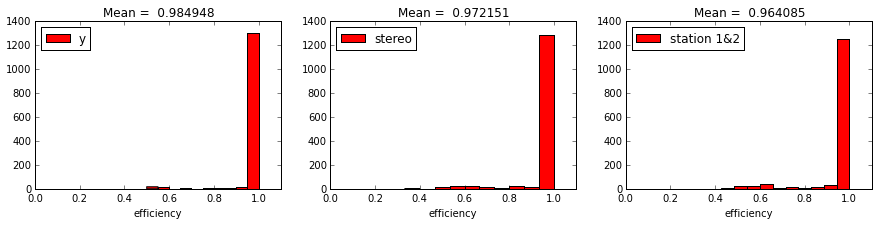

In [18]:
plt.figure(figsize=(15, 3))

plt.subplot(1,3,1)
plt.title('Mean = % f' % numpy.array(eff_y).mean())
plt.hist(eff_y, label='y')
plt.xlabel('efficiency')
plt.xlim(0, 1.1)
plt.legend(loc='best')

plt.subplot(1,3,2)
plt.title('Mean = % f' % numpy.array(eff_stereo).mean())
plt.hist(eff_stereo, label='stereo')
plt.xlabel('efficiency')
plt.xlim(0, 1.1)
plt.legend(loc='best')

plt.subplot(1,3,3)
plt.title('Mean = % f' % numpy.array(eff_station).mean())
plt.hist(eff_station, label='station 1&2')
plt.xlabel('efficiency')
plt.xlim(0, 1.1)
plt.legend(loc='best')

plt.show()

### Stations 3&4

In [19]:
from efficiency import efficiency_per_track

eff_y, eff_stereo, eff_station = efficiency_per_track(reconstructible_events.keys(), 
                                                                     all_hits, 
                                                                     reco_events34)

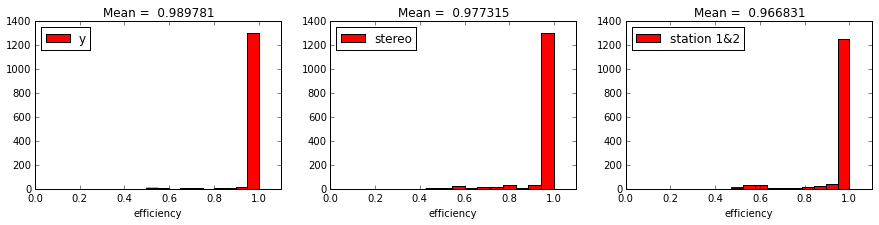

In [20]:
plt.figure(figsize=(15, 3))

plt.subplot(1,3,1)
plt.title('Mean = % f' % numpy.array(eff_y).mean())
plt.hist(eff_y, label='y')
plt.xlabel('efficiency')
plt.xlim(0, 1.1)
plt.legend(loc='best')

plt.subplot(1,3,2)
plt.title('Mean = % f' % numpy.array(eff_stereo).mean())
plt.hist(eff_stereo, label='stereo')
plt.xlabel('efficiency')
plt.xlim(0, 1.1)
plt.legend(loc='best')

plt.subplot(1,3,3)
plt.title('Mean = % f' % numpy.array(eff_station).mean())
plt.hist(eff_station, label='station 1&2')
plt.xlabel('efficiency')
plt.xlim(0, 1.1)
plt.legend(loc='best')

plt.show()

# Efficiency per event

Total efficiency per event is  92.2058823529  %


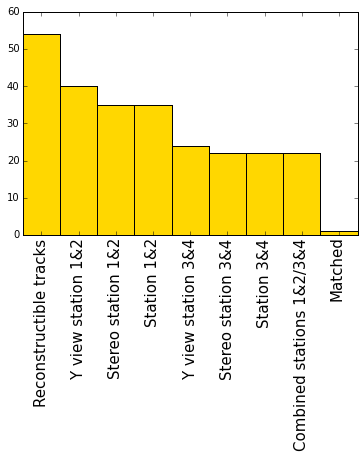

In [21]:
from efficiency import efficiency_per_event

n_events, missed_events = efficiency_per_event(reconstructible_events, 
                                               reco_events12, 
                                               reco_events34, 
                                               match_tracks, 
                                               true_pdg_dict,
                                               all_hits)

n_events = numpy.array(n_events)

labels = ['Reconstructible tracks', 
          'Y view station 1&2', 
          'Stereo station 1&2', 
          'Station 1&2',
          'Y view station 3&4', 
          'Stereo station 3&4',
          'Station 3&4',
          'Combined stations 1&2/3&4',
          'Matched']

print 'Total efficiency per event is ', 1. * n_events[-1] / n_events[0] * 100., ' %'

x = range(len(labels))
#plt.figure(figsize=(15,5))
plt.bar(x, n_events - n_events.min() + 1., width=1., color='gold', align='center')
plt.xticks(x, labels, rotation=90, size=15)
plt.xlim(-0.5, 8.5)
plt.show()

In [22]:
n_events

array([ 680.,  666.,  661.,  661.,  650.,  648.,  648.,  648.,  627.])

In [23]:
numpy.array(missed_events)

array([3110, 4156, 3253, 1090, 3165, 4811, 4297,  381, 3085, 3190, 3498,
       4580, 2654, 2040,  270, 3781, 4595, 1528, 3670,    7,  143, 4490,
        426,  670, 3749, 1722, 1756, 3194, 1848, 3916, 1142, 4342, 2762,
       4108,  102, 3750, 4439, 3298, 2277, 4817, 2263, 2624, 4334, 2455,
       4175, 3650, 2720,  715, 1769,  970, 3607, 3241, 1023])

# Momentum

y = b + kx
k, b =  0.00473134023255 -0.00377230947905
Cov matrix is 
[[  4.04636434e-06  -3.08904528e-07]
 [ -3.08904528e-07   1.86015671e-05]]


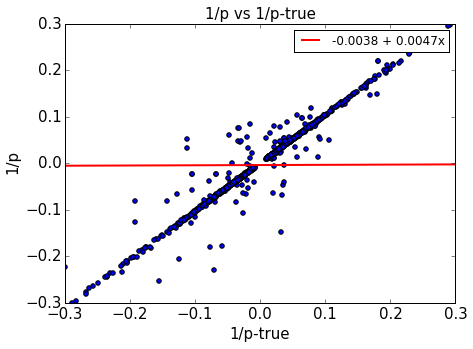

In [24]:
from MatchTracks import get_pinv_true_pinv
        
pinv, true_pinv = get_pinv_true_pinv(pinv_dict, true_pinv_dict, true_charge_dict)
        

[k, b], cov = numpy.polyfit(true_pinv, pinv, 1, cov=True)
print 'y = b + kx'
print 'k, b = ', k, b
print 'Cov matrix is '
print cov

plt.figure(figsize=(7, 5))
plt.title('1/p vs 1/p-true', size=15)
plt.scatter(true_pinv, pinv)
x = numpy.array([-0.3, 0.3])
plt.plot(x, k * x + b, color='r', linewidth=2, label='%.4f + ' % b + '%.4fx' % k)
plt.legend(loc='best')
plt.ylabel('1/p', size=15)
plt.xlabel('1/p-true', size=15)
plt.xlim(-0.3, 0.3)
plt.ylim(-0.3, 0.3)
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

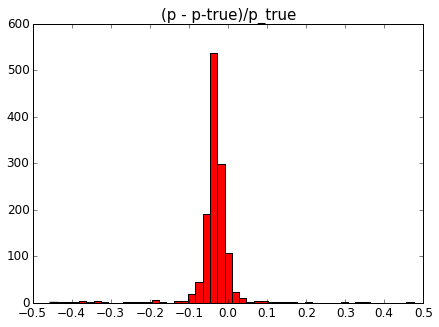

In [25]:
metric = true_pinv/pinv - 1

plt.figure(figsize=(7, 5))
plt.hist(metric[numpy.abs(metric) <= 0.5], bins=50)

plt.title('(p - p-true)/p_true', size=15)
plt.xticks(numpy.arange(-0.5, 0.51, 0.1), size=12)
plt.yticks(size=12)
plt.xlim(-0.5, 0.5)
plt.show()